## Importing the libraries

In [ ]:
import sys

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Reading the dataset

In [ ]:
cars_original_data = pd.read_csv("used_cars_data.csv", dtype={"vin": object, "back_legroom": object, "bed": object, "bed_height": object, "bed_length": object, "body_type": object, "cabin": object, "city": object, "city_fuel_economy": float, "combine_fuel_economy": float, "daysonmarket": int, "dealer_zip": object, "description": object, "engine_cylinders": object, "engine_displacement": float, "engine_type": object, "exterior_color": object, "fleet": object, "frame_damaged": object, "franchise_dealer": bool, "franchise_make": object, "front_legroom": object, "fuel_tank_volume": object, "fuel_type": object, "has_accidents": object, "height": object, "highway_fuel_economy": float, "horsepower": float, "interior_color": object, "isCab": object, "is_certified": float, "is_cpo": object, "is_new": bool, "is_oemcpo": object, "latitude": float, "length": object, "listed_date": object, "listing_color": object, "listing_id": int, "longitude": float, "main_picture_url": object, "major_options": object, "make_name": object, "maximum_seating": object, "mileage": float, "model_name": object, "owner_count": float, "power": object, "price": float, "salvage": object, "savings_amount": int, "seller_rating": float, "sp_id": float, "sp_name": object, "theft_title": object, "torque": object, "transmission": object, "transmission_display": object, "trimId": object, "trim_name": object, "vehicle_damage_category": float, "wheel_system": object, "wheel_system_display": object, "wheelbase": object, "width": object, "year": int})

In [178]:
cars = cars_original_data.copy(deep=True)

## Data Wrangling

### Setting the view parameters

In [179]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)

### Determining N and no. of variables

In [180]:
print(cars.shape)

(3000040, 66)


### Splitting torque column to eliminate RPM

In [181]:
new1 = cars["torque"].str.split(" ", n = 1, expand = True)

cars['torque'] = new1[0]

### Splitting engine_type to engine_type and cylinders

In [182]:
new2 = cars['engine_type'].str.extractall(r'([a-zA-Z]+)([0-9]+)').unstack()
new2.columns = ['engine_type', 'cylinders']

In [183]:
cars['engine_type'] = new2['engine_type']
cars['cylinders'] = new2['cylinders']

### Mapping state name to city in the dataset

In [184]:
us_cs = pd.read_csv("us_cities_states.csv", encoding='cp1252')

In [185]:
state_name = us_cs.set_index('city')['state'].to_dict()

In [186]:
cars['city'] = cars['city'].str.lstrip(' ')
cars['city'] = cars['city'].str.rstrip(' ')
cars['city'] = cars['city'].str.lower()
cars['city'] = cars['city'].str.title()

In [187]:
# Mapping state name to corresponding zip value in the dataset
cars['state'] = cars['city'].map(state_name)

In [188]:
# Replace NaN (74 values resulting from Canon City) Colorado
cars['state'] = cars['state'].replace(np.nan, 'Colorado')

In [189]:
cars.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year,cylinders,state
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,200,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019,4,Puerto Rico
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,269,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,4,Puerto Rico
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,290,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016,4,Puerto Rico
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,00922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,332,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020,6,Puerto Rico
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,269,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,4,Puerto Rico


### Dropping rows with state frequency less than 11

In [190]:
state = cars[['state']]

In [191]:
cars[state.replace(state.apply(pd.Series.value_counts)).gt(10).all(1)]

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year,cylinders,state
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.800000,370599.0,Flagship Chrysler,NaN,200,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019,4,Puerto Rico
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.000000,389227.0,Land Rover San Juan,NaN,269,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,4,Puerto Rico
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,290,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016,4,Puerto Rico
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,00922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.000000,389227.0,Land Rover San Juan,NaN,332,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020,6,Puerto Rico
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.000000,389227.0,Land Rover San Juan,NaN,269,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,4,Puerto Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### Dropping columns that are not needed

In [192]:
cars = cars.drop(['vin', 'bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy', 'dealer_zip','franchise_dealer', 'description', 'fleet', 'frame_damaged', 'isCab', 'is_certified', 'is_cpo', 'is_oemcpo', 'listing_id', 'listed_date', 'main_picture_url', 'major_options', 'owner_count', 'salvage', 'sp_id', 'theft_title', 'trimId', 'vehicle_damage_category', 'price'], axis =1)


### Excluding string of measure from continuous variables

In [193]:
cars['back_legroom'] = cars['back_legroom'].str.replace(" in", "")

cars['front_legroom'] = cars['front_legroom'].str.replace(" in", "")

cars['fuel_tank_volume'] = cars['fuel_tank_volume'].str.replace(" gal", "")

cars['height'] = cars['height'].str.replace(" in", "")

cars['length'] = cars['length'].str.replace(" in", "")

cars['width'] = cars['width'].str.replace(" in", "")

cars['wheelbase'] = cars['wheelbase'].str.replace(" in", "")

### Replacing row values containing "--" with Nan

In [194]:
cars = cars.replace('--', np.nan, regex = True)

### Dropping rows with any NaN values and retaining rows with full information

In [195]:
cars = cars.dropna()

In [196]:
print(cars.shape)

(729389, 42)


### Converting continous variables to numeric data type

In [197]:
cols_to_convert = ['year', 'back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'width', 'wheelbase', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'latitude', 'longitude', 'mileage', 'savings_amount', 'seller_rating', 'torque', 'cylinders'] 
cars[cols_to_convert] = cars[cols_to_convert].apply(pd.to_numeric, errors='coerce')


### Coverting categorical variables to category datatype

In [198]:
cols = cars.select_dtypes(exclude=['float', 'int'])
for col in cols:
    cars[col] = cars[col].astype('category')

### Eliminating continuous variables with high correlation and VIF

In [199]:
drop1 = ['latitude', 'longitude', 'wheelbase', 'city_fuel_economy', 'highway_fuel_economy', 'front_legroom', 'height', 'width', 'back_legroom', 'length', 'engine_displacement', 'city_fuel_economy', 'torque', 'fuel_tank_volume', 'cylinders']

### Dropping varibles (continuous & categorical) from cars based on correlation, VIF, and Cramer's V

In [200]:
drop2 = ['sp_name', 'trim_name', 'city', 'engine_cylinders', 'exterior_color', 'interior_color', 'franchise_make', 'transmission_display', 'power', 'wheel_system_display']

### Dropping variables that are not used in final model

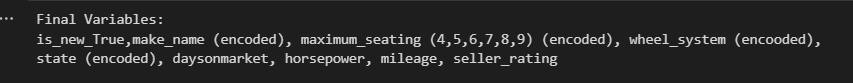

In [201]:
drop3 = ['body_type', 'engine_type', 'fuel_type', 'has_accidents', 'listing_color', 'transmission', 'savings_amount']

In [202]:
cars = cars.drop(drop1, axis = 1)
cars = cars.drop(drop2, axis =1)
cars = cars.drop(drop3, axis =1)

## Final dataset check

In [203]:
# Final dataset shape
print(cars.shape)

(729389, 11)


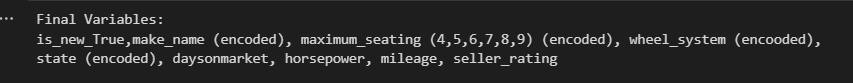

In [204]:
# Final columns retained
cars.columns

Index(['daysonmarket', 'horsepower', 'is_new', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'seller_rating', 'wheel_system', 'year',
       'state'],
      dtype='object')

In [205]:
cars.shape

(729389, 11)

## Scaling the dataset

###  One-hot encoding for categorical variables

In [206]:
df3 = pd.DataFrame()

for column in cars.select_dtypes(include=['category', 'bool']):
    df3[column] = cars[column]
        
df3.head()

,is_new,make_name,maximum_seating,model_name,wheel_system,state
38,False,Chevrolet,5 seats,Malibu,FWD,New York
40,False,Lexus,4 seats,RC 350,AWD,New York
41,False,Chevrolet,8 seats,Traverse,FWD,New York
45,False,Chevrolet,8 seats,Traverse,AWD,New York
47,False,Jeep,5 seats,Grand Cherokee,4WD,New York


In [207]:
df3 = df3.drop(['model_name'],axis=1)
df3.head()

,is_new,make_name,maximum_seating,wheel_system,state
38,False,Chevrolet,5 seats,FWD,New York
40,False,Lexus,4 seats,AWD,New York
41,False,Chevrolet,8 seats,FWD,New York
45,False,Chevrolet,8 seats,AWD,New York
47,False,Jeep,5 seats,4WD,New York


In [208]:
df5 = pd.get_dummies(df3, drop_first = True)

In [209]:
df5.head()

,is_new_True,make_name_Alfa Romeo,make_name_Aston Martin,make_name_Audi,make_name_BMW,make_name_Bentley,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Dodge,make_name_FIAT,make_name_Ford,make_name_GMC,make_name_Genesis,make_name_Honda,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Kia,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_MINI,make_name_Maserati,make_name_Mazda,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Nissan,make_name_Oldsmobile,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_Saab,make_name_Saturn,make_name_Scion,make_name_Subaru,make_name_Suzuki,make_name_Toyota,make_name_Volkswagen,make_name_Volvo,maximum_seating_12 seats,maximum_seating_15 seats,maximum_seating_2 seats,maximum_seating_3 seats,maximum_seating_4 seats,maximum_seating_5 seats,maximum_seating_6 seats,maximum_seating_7 seats,maximum_seating_8 seats,maximum_seating_9 seats,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
38,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Note: has_accidents is not included in the final dataset as there is only one category 'Unknown' after pre-processing

### Concatenating categorical variables dataframe with continuous variables dataframe post one-hot encoding

In [210]:
df4 = pd.DataFrame()
          
for column in cars.select_dtypes(exclude=['category', 'bool']):
    df4[column] = cars[column]
    
df4 = df4.drop(['year'], axis=1)  
df4.head()

,daysonmarket,horsepower,mileage,seller_rating
38,55,160.0,42394.0,3.447761
40,36,311.0,62251.0,2.800000
41,27,310.0,36410.0,3.447761
45,27,281.0,36055.0,3.447761
47,24,295.0,25745.0,3.447761


In [211]:
cars_coded = pd.concat([df5, df4], axis=1)

In [212]:
cars_coded.head()

,is_new_True,make_name_Alfa Romeo,make_name_Aston Martin,make_name_Audi,make_name_BMW,make_name_Bentley,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Dodge,make_name_FIAT,make_name_Ford,make_name_GMC,make_name_Genesis,make_name_Honda,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Kia,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_MINI,make_name_Maserati,make_name_Mazda,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Nissan,make_name_Oldsmobile,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_Saab,make_name_Saturn,make_name_Scion,make_name_Subaru,make_name_Suzuki,make_name_Toyota,make_name_Volkswagen,make_name_Volvo,maximum_seating_12 seats,maximum_seating_15 seats,maximum_seating_2 seats,maximum_seating_3 seats,maximum_seating_4 seats,maximum_seating_5 seats,maximum_seating_6 seats,maximum_seating_7 seats,maximum_seating_8 seats,maximum_seating_9 seats,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,daysonmarket,horsepower,mileage,seller_rating
38,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,160.0,42394.0,3.447761
40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,311.0,62251.0,2.800000
41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,310.0,36410.0,3.447761
45,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,281.0,36055.0,3.447761
47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,295.0,25745.0,3.447761


In [213]:
cars_coded= cars_coded.drop(['maximum_seating_12 seats','maximum_seating_15 seats','maximum_seating_2 seats', 'maximum_seating_3 seats','maximum_seating_9 seats'],axis=1)

In [214]:
cars_coded.shape

(729389, 110)

### Scaling the train and test sets using Robust and Standard Scaler

Robust and Standard scaling helps with eliminating the outliers, normalizing, and standardizing the datasets

In [215]:
def scaling(x):
    scale = preprocessing.RobustScaler()
    x_t1 = scale.fit_transform(x)
    
    scale = preprocessing.StandardScaler()
    x_t2 = scale.fit_transform(x_t1)
    
    return(x_t2)

In [216]:
cars_coded_scaled = scaling(cars_coded)


In [217]:
cars_coded_scaled_df = pd.DataFrame(cars_coded_scaled, columns=list(cars_coded.columns), index=list(cars_coded.index))
cars_coded_scaled_df.head()

,is_new_True,make_name_Alfa Romeo,make_name_Aston Martin,make_name_Audi,make_name_BMW,make_name_Bentley,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Dodge,make_name_FIAT,make_name_Ford,make_name_GMC,make_name_Genesis,make_name_Honda,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Kia,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_MINI,make_name_Maserati,make_name_Mazda,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Nissan,make_name_Oldsmobile,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_Saab,make_name_Saturn,make_name_Scion,make_name_Subaru,make_name_Suzuki,make_name_Toyota,make_name_Volkswagen,make_name_Volvo,maximum_seating_4 seats,maximum_seating_5 seats,maximum_seating_6 seats,maximum_seating_7 seats,maximum_seating_8 seats,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,daysonmarket,horsepower,mileage,seller_rating
38,-0.181103,-0.032635,-0.005616,-0.109102,-0.175259,-0.020819,-0.124283,-0.14175,3.066754,-0.133107,-0.210308,-0.029332,-0.415021,-0.190702,-0.035383,-0.289872,-0.007406,-0.208557,-0.115047,-0.002868,-0.055527,-0.266330,-0.196702,-0.079106,-0.131762,-0.123799,-0.056744,-0.021848,-0.144172,-0.159376,-0.020047,-0.072931,-0.293183,-0.006519,-0.001656,-0.021016,-0.010208,-0.147821,-0.0133,-0.007312,-0.019771,-0.023366,-0.166409,-0.010005,-0.288366,-0.15957,-0.085065,-0.174643,0.701737,-0.31094,-0.385757,-0.295644,-0.194264,-0.615439,1.126723,-0.260181,-0.002028,-0.095624,-0.078808,-0.203451,-0.090274,-0.124459,-0.008763,-0.237811,-0.170391,-0.003513,-0.070575,-0.192298,-0.134699,-0.129153,-0.084926,-0.084934,-0.10411,-0.17781,-0.140238,-0.33059,-0.157393,-0.107834,-0.08683,-0.117013,-0.070261,-0.039496,-0.012337,-0.172202,-0.23482,-0.09731,3.269822,-0.171458,-0.055341,-0.171517,-0.108845,-0.024032,-0.309644,-0.093588,-0.117086,-0.127963,-0.047137,-0.108638,-0.193495,-0.08256,-0.148285,-0.15523,-0.035999,-0.149238,-0.123805,-0.035305,0.098110,-1.077589,-0.042126,-1.682600
40,-0.181103,-0.032635,-0.005616,-0.109102,-0.175259,-0.020819,-0.124283,-0.14175,-0.326078,-0.133107,-0.210308,-0.029332,-0.415021,-0.190702,-0.035383,-0.289872,-0.007406,-0.208557,-0.115047,-0.002868,-0.055527,-0.266330,-0.196702,-0.079106,7.589439,-0.123799,-0.056744,-0.021848,-0.144172,-0.159376,-0.020047,-0.072931,-0.293183,-0.006519,-0.001656,-0.021016,-0.010208,-0.147821,-0.0133,-0.007312,-0.019771,-0.023366,-0.166409,-0.010005,-0.288366,-0.15957,-0.085065,5.725974,-1.425034,-0.31094,-0.385757,-0.295644,-0.194264,1.624856,-0.887530,-0.260181,-0.002028,-0.095624,-0.078808,-0.203451,-0.090274,-0.124459,-0.008763,-0.237811,-0.170391,-0.003513,-0.070575,-0.192298,-0.134699,-0.129153,-0.084926,-0.084934,-0.10411,-0.17781,-0.140238,-0.33059,-0.157393,-0.107834,-0.08683,-0.117013,-0.070261,-0.039496,-0.012337,-0.172202,-0.23482,-0.09731,3.269822,-0.171458,-0.055341,-0.171517,-0.108845,-0.024032,-0.309644,-0.093588,-0.117086,-0.127963,-0.047137,-0.108638,-0.193495,-0.08256,-0.148285,-0.15523,-0.035999,-0.149238,-0.123805,-0.035305,-0.137862,0.740990,0.502065,-3.000416


In [218]:
cars_coded_scaled_df.shape

(729389, 110)

### Prep cars dataset for Inner Join

In [219]:
cars_PK = cars.drop(['daysonmarket', 'horsepower', 'is_new',  'maximum_seating', 'mileage', 'seller_rating', 'wheel_system', 'state'],axis=1)
cars_PK.head()

,make_name,model_name,year
38,Chevrolet,Malibu,2018
40,Lexus,RC 350,2018
41,Chevrolet,Traverse,2018
45,Chevrolet,Traverse,2017
47,Jeep,Grand Cherokee,2018


In [220]:
cars_coded_NOTSCALED = pd.concat([cars_PK, cars_coded], axis=1)
cars_coded_NOTSCALED.head()


,make_name,model_name,year,is_new_True,make_name_Alfa Romeo,make_name_Aston Martin,make_name_Audi,make_name_BMW,make_name_Bentley,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Dodge,make_name_FIAT,make_name_Ford,make_name_GMC,make_name_Genesis,make_name_Honda,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Kia,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_MINI,make_name_Maserati,make_name_Mazda,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Nissan,make_name_Oldsmobile,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_Saab,make_name_Saturn,make_name_Scion,make_name_Subaru,make_name_Suzuki,make_name_Toyota,make_name_Volkswagen,make_name_Volvo,maximum_seating_4 seats,maximum_seating_5 seats,maximum_seating_6 seats,maximum_seating_7 seats,maximum_seating_8 seats,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,daysonmarket,horsepower,mileage,seller_rating
38,Chevrolet,Malibu,2018,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,160.0,42394.0,3.447761
40,Lexus,RC 350,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,311.0,62251.0,2.800000
41,Chevrolet,Traverse,2018,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,310.0,36410.0,3.447761
45,Chevrolet,Traverse,2017,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,281.0,36055.0,3.447761
47,Jeep,Grand Cherokee,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,295.0,25745.0,3.447761


In [221]:
cars_coded_SCALED = pd.concat([cars_PK, cars_coded_scaled_df], axis=1)
cars_coded_SCALED.head()

,make_name,model_name,year,is_new_True,make_name_Alfa Romeo,make_name_Aston Martin,make_name_Audi,make_name_BMW,make_name_Bentley,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Dodge,make_name_FIAT,make_name_Ford,make_name_GMC,make_name_Genesis,make_name_Honda,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Kia,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_MINI,make_name_Maserati,make_name_Mazda,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Nissan,make_name_Oldsmobile,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_Saab,make_name_Saturn,make_name_Scion,make_name_Subaru,make_name_Suzuki,make_name_Toyota,make_name_Volkswagen,make_name_Volvo,maximum_seating_4 seats,maximum_seating_5 seats,maximum_seating_6 seats,maximum_seating_7 seats,maximum_seating_8 seats,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,daysonmarket,horsepower,mileage,seller_rating
38,Chevrolet,Malibu,2018,-0.181103,-0.032635,-0.005616,-0.109102,-0.175259,-0.020819,-0.124283,-0.14175,3.066754,-0.133107,-0.210308,-0.029332,-0.415021,-0.190702,-0.035383,-0.289872,-0.007406,-0.208557,-0.115047,-0.002868,-0.055527,-0.266330,-0.196702,-0.079106,-0.131762,-0.123799,-0.056744,-0.021848,-0.144172,-0.159376,-0.020047,-0.072931,-0.293183,-0.006519,-0.001656,-0.021016,-0.010208,-0.147821,-0.0133,-0.007312,-0.019771,-0.023366,-0.166409,-0.010005,-0.288366,-0.15957,-0.085065,-0.174643,0.701737,-0.31094,-0.385757,-0.295644,-0.194264,-0.615439,1.126723,-0.260181,-0.002028,-0.095624,-0.078808,-0.203451,-0.090274,-0.124459,-0.008763,-0.237811,-0.170391,-0.003513,-0.070575,-0.192298,-0.134699,-0.129153,-0.084926,-0.084934,-0.10411,-0.17781,-0.140238,-0.33059,-0.157393,-0.107834,-0.08683,-0.117013,-0.070261,-0.039496,-0.012337,-0.172202,-0.23482,-0.09731,3.269822,-0.171458,-0.055341,-0.171517,-0.108845,-0.024032,-0.309644,-0.093588,-0.117086,-0.127963,-0.047137,-0.108638,-0.193495,-0.08256,-0.148285,-0.15523,-0.035999,-0.149238,-0.123805,-0.035305,0.098110,-1.077589,-0.042126,-1.682600
40,Lexus,RC 350,2018,-0.181103,-0.032635,-0.005616,-0.109102,-0.175259,-0.020819,-0.124283,-0.14175,-0.326078,-0.133107,-0.210308,-0.029332,-0.415021,-0.190702,-0.035383,-0.289872,-0.007406,-0.208557,-0.115047,-0.002868,-0.055527,-0.266330,-0.196702,-0.079106,7.589439,-0.123799,-0.056744,-0.021848,-0.144172,-0.159376,-0.020047,-0.072931,-0.293183,-0.006519,-0.001656,-0.021016,-0.010208,-0.147821,-0.0133,-0.007312,-0.019771,-0.023366,-0.166409,-0.010005,-0.288366,-0.15957,-0.085065,5.725974,-1.425034,-0.31094,-0.385757,-0.295644,-0.194264,1.624856,-0.887530,-0.260181,-0.002028,-0.095624,-0.078808,-0.203451,-0.090274,-0.124459,-0.008763,-0.237811,-0.170391,-0.003513,-0.070575,-0.192298,-0.134699,-0.129153,-0.084926,-0.084934,-0.10411,-0.17781,-0.140238,-0.33059,-0.157393,-0.107834,-0.08683,-0.117013,-0.070261,-0.039496,-0.012337,-0.172202,-0.23482,-0.09731,3.269822,-0.171458,-0.055341,-0.171517,-0.108845,-0.024032,-0.309644,-0.093588,-0.117086,-0.127963,-0.047137,-0.108638,-0.193495,-0.08256,-0.148285,-0.15523,-0.035999,-0

### Inner Join

In [222]:
stamford = pd.read_csv('finallist.csv', usecols=['make_name', 'model_name', 'year'])
stamford.head()

,make_name,model_name,year
0,Mercedes-Benz,C-Class,2012
1,Hyundai,Santa Fe,2012
2,Porsche,Panamera,2012
3,Jeep,Grand Cherokee,2012
4,Toyota,Corolla,2012


In [223]:
merged_df_NOTSCALED = cars_coded_NOTSCALED.merge(stamford, how='inner', left_on=['make_name', 'model_name','year'], right_on=['make_name', 'model_name', 'year'])
merged_df_NOTSCALED.head()

,make_name,model_name,year,is_new_True,make_name_Alfa Romeo,make_name_Aston Martin,make_name_Audi,make_name_BMW,make_name_Bentley,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Dodge,make_name_FIAT,make_name_Ford,make_name_GMC,make_name_Genesis,make_name_Honda,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Kia,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_MINI,make_name_Maserati,make_name_Mazda,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Nissan,make_name_Oldsmobile,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_Saab,make_name_Saturn,make_name_Scion,make_name_Subaru,make_name_Suzuki,make_name_Toyota,make_name_Volkswagen,make_name_Volvo,maximum_seating_4 seats,maximum_seating_5 seats,maximum_seating_6 seats,maximum_seating_7 seats,maximum_seating_8 seats,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,daysonmarket,horsepower,mileage,seller_rating
0,Hyundai,Santa Fe,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,276.0,62783.0,3.447761
1,Hyundai,Santa Fe,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,175.0,73670.0,4.611111
2,Hyundai,Santa Fe,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,276.0,109188.0,4.818182
3,Hyundai,Santa Fe,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,276.0,104504.0,4.533333
4,Hyundai,Santa Fe,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,276.0,77034.0,4.727273


In [224]:
merged_df_SCALED = cars_coded_SCALED.merge(stamford, how='inner', left_on=['make_name', 'model_name','year'], right_on=['make_name', 'model_name', 'year'])
merged_df_SCALED.head()

,make_name,model_name,year,is_new_True,make_name_Alfa Romeo,make_name_Aston Martin,make_name_Audi,make_name_BMW,make_name_Bentley,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Dodge,make_name_FIAT,make_name_Ford,make_name_GMC,make_name_Genesis,make_name_Honda,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Kia,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_MINI,make_name_Maserati,make_name_Mazda,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Nissan,make_name_Oldsmobile,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_Saab,make_name_Saturn,make_name_Scion,make_name_Subaru,make_name_Suzuki,make_name_Toyota,make_name_Volkswagen,make_name_Volvo,maximum_seating_4 seats,maximum_seating_5 seats,maximum_seating_6 seats,maximum_seating_7 seats,maximum_seating_8 seats,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,daysonmarket,horsepower,mileage,seller_rating
0,Hyundai,Santa Fe,2012,-0.181103,-0.032635,-0.005616,-0.109102,-0.175259,-0.020819,-0.124283,-0.14175,-0.326078,-0.133107,-0.210308,-0.029332,-0.415021,-0.190702,-0.035383,-0.289872,-0.007406,4.794861,-0.115047,-0.002868,-0.055527,-0.26633,-0.196702,-0.079106,-0.131762,-0.123799,-0.056744,-0.021848,-0.144172,-0.159376,-0.020047,-0.072931,-0.293183,-0.006519,-0.001656,-0.021016,-0.010208,-0.147821,-0.0133,-0.007312,-0.019771,-0.023366,-0.166409,-0.010005,-0.288366,-0.15957,-0.085065,-0.174643,0.701737,-0.31094,-0.385757,-0.295644,-0.194264,1.624856,-0.88753,-0.260181,-0.002028,-0.095624,-0.078808,-0.203451,-0.090274,-0.124459,-0.008763,-0.237811,-0.170391,-0.003513,-0.070575,-0.192298,-0.134699,-0.129153,-0.084926,-0.084934,-0.10411,-0.177810,-0.140238,-0.33059,-0.157393,-0.107834,-0.08683,-0.117013,-0.070261,-0.039496,-0.012337,-0.172202,-0.23482,-0.09731,3.269822,-0.171458,-0.055341,-0.171517,-0.108845,-0.024032,-0.309644,-0.093588,-0.117086,-0.127963,-0.047137,-0.108638,-0.193495,-0.08256,-0.148285,-0.15523,-0.035999,-0.149238,-0.123805,-0.035305,-0.572546,0.319465,0.516645,-1.682600
1,Hyundai,Santa Fe,2012,-0.181103,-0.032635,-0.005616,-0.109102,-0.175259,-0.020819,-0.124283,-0.14175,-0.326078,-0.133107,-0.210308,-0.029332,-0.415021,-0.190702,-0.035383,-0.289872,-0.007406,4.794861,-0.115047,-0.002868,-0.055527,-0.26633,-0.196702,-0.079106,-0.131762,-0.123799,-0.056744,-0.021848,-0.144172,-0.159376,-0.020047,-0.072931,-0.293183,-0.006519,-0.001656,-0.021016,-0.010208,-0.147821,-0.0133,-0.007312,-0.019771,-0.023366,-0.166409,-0.010005,-0.288366,-0.15957,-0.085065,-0.174643,0.701737,-0.31094,-0.385757,-0.295644,-0.194264,1.624856,-0.88753,-0.260181,-0.002028,-0.095624,-0.078808,-0.203451,-0.090274,-0.124459,-0.008763,-0.237811,-0.170391,-0.003513,-0.070575,-0.192298,-0.134699,-0.129153,-0.084926,-0.084934,-0.10411,-0.177810,-0.140238,-0.33059,-0.157393,-0.107834,-0.08683,-0.117013,-0.070261,-0.039496,-0.012337,5.807141,-0.23482,-0.09731,-0.305827,-0.171458,-0.055341,-0.171517,-0.108845,-0.024032,-0.309644,-0.093588,-0.117086,-0.127963,-0.047137,-0.108638,-0.193495,-0.08256,-0.148285,-0.15523,-0.035999,-0.

In [228]:
merged_df_NOTSCALED.shape

(5213, 113)

In [229]:
merged_df_SCALED.shape

(5213, 113)

In [227]:
merged_df_NOTSCALED.to_csv('VLOOKUP_not_scaled.csv', index=False)
merged_df_SCALED.to_csv('VLOOKUP_scaled.csv', index=False)